In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

info = {
    'np_version': np.__version__,
    'pd_version': pd.__version__
}
info

{'np_version': '1.17.1', 'pd_version': '0.25.1'}

# Introduction

## Features

- data analysis / manipulation tool
- Tabular data with heterogeneously-typed columns
- SQL, CSV, Excel, txt interface
- Ordered and unordered (not necessarily fixed-frequency) time series data.


# Data manipulation

## General principles

- value-mutable
- size-immutable

- system options
  - [pd options reference](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html)

## Series

- 1D data structrue

In [1]:
import numpy as np
import pandas as pd
import math
import random
from datetime import datetime

In [71]:
s = pd.Series(range(1,7), index=pd.date_range('20130102', periods=6))
s

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [72]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    6
2    3
3    1
4    6
5    3
6    4
7    6
8    2
9    6
dtype: int32

### Struct

In [45]:
def get_props(s):
    deprecated = ['base', 'data', 'flags', 'ftype', 'ftypes', 'real', 'imag', 'itemsize','ix', 'strides']
    props = list(filter(len, [name if not name.startswith('_') else "" for name in dir(s)]))
    data_props = list(filter(lambda x: (x not in deprecated) and (not callable(getattr(s,x))), props))
    return data_props

In [73]:
get_props(s)

['T',
 'array',
 'axes',
 'dtype',
 'dtypes',
 'empty',
 'hasnans',
 'index',
 'is_monotonic',
 'is_monotonic_decreasing',
 'is_monotonic_increasing',
 'is_unique',
 'name',
 'nbytes',
 'ndim',
 'shape',
 'size',
 'values']

In [74]:
def series_info(s):
    return {
        'shape': s.shape,
        'ndim': s.ndim,
        'size': s.size,
        'dtype': s.dtype,
        'nbytes': s.nbytes,
        'name': s.name
    }
series_info(s)

{'shape': (10,),
 'ndim': 1,
 'size': 10,
 'dtype': dtype('int32'),
 'nbytes': 40,
 'name': None}

In [102]:
s.describe()

count    5.000000
mean     0.089693
std      0.980062
min     -0.992462
25%     -0.872463
50%      0.394034
75%      0.696134
max      1.223224
dtype: float64

In [76]:
s.index, s.axes, s.values, s.array

(RangeIndex(start=0, stop=10, step=1),
 [RangeIndex(start=0, stop=10, step=1)],
 array([3, 6, 3, 1, 6, 3, 4, 6, 2, 6]),
 <PandasArray>
 [3, 6, 3, 1, 6, 3, 4, 6, 2, 6]
 Length: 10, dtype: int32)

In [85]:
s.is_unique

True

In [75]:
s.to_numpy()

array([3, 6, 3, 1, 6, 3, 4, 6, 2, 6])

### Indexing

In [77]:
s =  pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    1.223224
b   -0.872463
c    0.394034
d    0.696134
e   -0.992462
dtype: float64

In [88]:
s.add_prefix('pandas_')

pandas_a    1.223224
pandas_b   -0.872463
pandas_c    0.394034
pandas_d    0.696134
pandas_e   -0.992462
dtype: float64

In [89]:
s.add_suffix('_end')

a_end    1.223224
b_end   -0.872463
c_end    0.394034
d_end    0.696134
e_end   -0.992462
dtype: float64

In [94]:
s.idxmax(), s.idxmin()

('a', 'e')

In [78]:
s['a'], s[['a','d','d']]

(1.2232239590009946, a    1.223224
 d    0.696134
 d    0.696134
 dtype: float64)

In [10]:
s[0], s[:4], s[:-1]

(-0.06585311940826405, a   -0.065853
 b    1.287230
 c   -1.017399
 d    1.372015
 dtype: float64, a   -0.065853
 b    1.287230
 c   -1.017399
 d    1.372015
 dtype: float64)

In [11]:
s[0]

-0.06585311940826405

### MultiIndex

In [79]:
sm = pd.Series(np.random.randn(9), 
                index = [['a', 'a', 'a', 'b', 'b', 'b', 'c','c','c'],
                        [1 , 2, 3, 1 , 2, 3, 1 , 2, 3]])

sm

a  1   -0.917114
   2   -0.382751
   3   -1.760294
b  1    1.145308
   2    0.492982
   3    1.203331
c  1   -1.028736
   2   -0.326800
   3   -0.026003
dtype: float64

In [80]:
sm.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('c', 3)],
           )

In [81]:
sm.unstack()

,1,2,3
a,-0.917114,-0.382751,-1.760294
b,1.145308,0.492982,1.203331
c,-1.028736,-0.326800,-0.026003


### Operation

In [98]:
s.head(2), s.tail(2)

(a    1.223224
 b   -0.872463
 dtype: float64, d    0.696134
 e   -0.992462
 dtype: float64)

In [105]:
s.sort_index(ascending=False,inplace=False)

e   -0.992462
d    0.696134
c    0.394034
b   -0.872463
a    1.223224
dtype: float64

In [104]:
s.sort_values()

e   -0.992462
b   -0.872463
c    0.394034
d    0.696134
a    1.223224
dtype: float64

In [84]:
s.explode()

a    1.223224
b   -0.872463
c    0.394034
d    0.696134
e   -0.992462
dtype: float64

In [285]:
s.replace(s['d'], 0)

a    2.763770
b   -1.561094
c    0.334144
d    0.000000
e    1.492388
dtype: float64

In [271]:
s.unique()

array([ 1.22322396, -0.87246327,  0.39403369,  0.69613419, -0.99246152])

In [ ]:
s.isnull(), s.notnull(), s.dropna()

In [ ]:
s.shift(), s.unshift()

In [100]:
 s.sum(), s.product(),s.mean()

(0.44846705230646344, 0.2905314335795632, 0.08969341046129269)

In [99]:
s.value_counts()

( 1.223224    1
 -0.992462    1
 -0.872463    1
  0.696134    1
  0.394034    1
 dtype: int64, 0.44846705230646344, 0.08969341046129269)

### apply and map

In [107]:
s.apply(lambda x: x*100)

a    122.322396
b    -87.246327
c     39.403369
d     69.613419
e    -99.246152
dtype: float64

In [108]:
s.map(lambda x: x if x > 0 else 0)

a    1.223224
b    0.000000
c    0.394034
d    0.696134
e    0.000000
dtype: float64

### Times Series

0.44846705230646344

## DataFrame

- 2D data structure

In [109]:
import numpy as np
import pandas as pd

### Struct and Ops

In [111]:
dates = pd.date_range('20130101', periods=6)
cols = list('ABCD')
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=cols)
df['Append'] = ['Mark', 'N', 'M', 'T', 'V', 5]

In [112]:
def get_props(df):
    deprecated = ['sparse', 'base', 'data', 'flags', 'ftype', 'ftypes', 'real', 'imag', 'itemsize','ix', 'strides']
    props = list(filter(len, [name if not name.startswith('_') else "" for name in dir(df)]))
    data_props = list(filter(lambda x: (x not in deprecated) and (not callable(getattr(df,x))), props))
    return data_props

In [113]:
get_props(df)

['A',
 'Append',
 'B',
 'C',
 'D',
 'T',
 'axes',
 'columns',
 'dtypes',
 'empty',
 'index',
 'ndim',
 'shape',
 'size',
 'style',
 'values']

In [114]:
def series_info(df):
    return {
        'shape': df.shape,
        'ndim': df.ndim,
        'size': df.size,
        'dtype': df.dtypes
    }
series_info(df)

{'shape': (6, 5), 'ndim': 2, 'size': 30, 'dtype': A         float64
 B         float64
 C         float64
 D         float64
 Append     object
 dtype: object}

In [115]:
df.index, df.columns, df.axes, df.values

(DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                '2013-01-05', '2013-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D', 'Append'], dtype='object'),
 [DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
                 '2013-01-05', '2013-01-06'],
                dtype='datetime64[ns]', freq='D'),
  Index(['A', 'B', 'C', 'D', 'Append'], dtype='object')],
 array([[0.39842950374007685, -0.11701315181632585, -1.2516491547553803,
         1.3553078814304438, 'Mark'],
        [0.5835097535039224, 0.4186196911902567, -0.8262367702648815,
         -0.40034216639279097, 'N'],
        [-0.3011863634144964, -0.18497247757028684, -0.6464034001870663,
         -0.14351239330852733, 'M'],
        [0.7804656102719784, -1.0212473067724799, 1.1554608010524865,
         -0.2331256793700084, 'T'],
        [1.5583493095420689, -0.39359130669844666, -1.6177295651443746,
         0.24119883340358522, 'V'],
       

In [116]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 5 columns):
A         6 non-null float64
B         6 non-null float64
C         6 non-null float64
D         6 non-null float64
Append    6 non-null object
dtypes: float64(4), object(1)
memory usage: 288.0+ bytes


(None,               A         B         C         D
 count  6.000000  6.000000  6.000000  6.000000
 mean   0.611982 -0.217497 -0.816513 -0.147286
 std    0.600985  0.476912  1.053739  0.990064
 min   -0.301186 -1.021247 -1.712518 -1.703243
 25%    0.444700 -0.341437 -1.526209 -0.358538
 50%    0.617918 -0.150993 -1.038943 -0.188319
 75%    0.748431 -0.034335 -0.691362  0.145021
 max    1.558349  0.418620  1.155461  1.355308)

In [118]:
df.head(2), df.tail(1)

(                  A         B         C         D Append
 2013-01-01  0.39843 -0.117013 -1.251649  1.355308   Mark
 2013-01-02  0.58351  0.418620 -0.826237 -0.400342      N,
                    A         B         C         D Append
 2013-01-06  0.652326 -0.006776 -1.712518 -1.703243      5)

In [ ]:
df.copy()
df.sub(), df.add(), df.mul(), df.div()
df.eq(), df.ne(), df.lt(), df.gt(), df.le(), df.ge()
df.empty, df.any(), df.all(), df.bool()
(df + df).equals(df * 2)

### type coercion

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32561 entries, 385a8c7272bc5e6297968bebc5ca5bed to 9195b0745032521481f2a350a408d047
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
edu-num           32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap-gain          32561 non-null int64
cap-loss          32561 non-null int64
hour/week         32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [53]:
df.sex.dtype

CategoricalDtype(categories=[' Female', ' Male'], ordered=False)

In [12]:
cols = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'country','salary' ]
df[cols].astype('category')

,workclass,education,marital-status,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Own-child,White,Male,United-States,<=50K


In [13]:
df[cols]=df[cols].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
edu-num           32561 non-null int64
marital-status    32561 non-null category
occupation        32561 non-null object
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
cap-gain          32561 non-null int64
cap-loss          32561 non-null int64
hour/week         32561 non-null int64
country           32561 non-null category
salary            32561 non-null category
description       32561 non-null object
dtypes: category(8), int64(6), object(2)
memory usage: 2.2+ MB


In [ ]:
df[cols]=pd.to_datetime(df.[cols])

### Indexing

In [6]:
cols = ["age","workclass","fnlwgt","education","edu-num","marital-status","occupation","relationship","race","sex","cap-gain","cap-loss","hour/week","country","salary"]
df = pd.read_csv('Data/adult.data.csv', header=None, names=cols)
df.head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- index, columns

In [159]:
df.index, df.columns, df.keys()

(RangeIndex(start=0, stop=32561, step=1),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss',
        'hour/week', 'country', 'salary'],
       dtype='object'),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'edu-num', 'marital-status',
        'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss',
        'hour/week', 'country', 'salary'],
       dtype='object'))

In [170]:
df.index.name='id',
df.index.name, df.index.names, df.columns.name, df.columns.names

(('id',), FrozenList([('id',)]), None, FrozenList([None]))

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
edu-num           32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
cap-gain          32561 non-null int64
cap-loss          32561 non-null int64
hour/week         32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [171]:
df.describe()

,age,fnlwgt,edu-num,cap-gain,cap-loss,hour/week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df2 = df.set_index(['country','occupation'])

In [10]:
df2[:3]

age          workclass  fnlwgt   education  \
country        occupation                                                       
 United-States  Adm-clerical        39          State-gov   77516   Bachelors   
                Exec-managerial     50   Self-emp-not-inc   83311   Bachelors   
                Handlers-cleaners   38            Private  215646     HS-grad   

                                   edu-num       marital-status  \
country        occupation                                         
 United-States  Adm-clerical            13        Never-married   
                Exec-managerial         13   Married-civ-spouse   
                Handlers-cleaners        9             Divorced   

                                     relationship    race    sex  cap-gain  \
country        occupation                                                    
 United-States  Adm-clerical        Not-in-family   White   Male      2174   
                Exec-managerial           Husband   White   Male         0   
                Handlers-cleaners   Not-in-family   White   Male         0   

                                   cap-loss  hour/week  salary  
country        occupation                                       
 United-States  Adm-clerical              0         40   <=50K  
                Exec-managerial           0         13   <=50K  
                Handlers-cleaners         0         40   <=50K

#### index column

In [175]:
df.age, type(df.age)

((id,)
 0        39
 1        50
 2        38
 3        53
 4        28
          ..
 32556    27
 32557    40
 32558    58
 32559    22
 32560    52
 Name: age, Length: 32561, dtype: int64, pandas.core.series.Series)

In [178]:
df['age'], type(df['age'])

((id,)
 0        39
 1        50
 2        38
 3        53
 4        28
          ..
 32556    27
 32557    40
 32558    58
 32559    22
 32560    52
 Name: age, Length: 32561, dtype: int64, pandas.core.series.Series)

In [182]:
df[['salary','age']], type(df[['salary','age']])

(       salary  age
 (id,)             
 0       <=50K   39
 1       <=50K   50
 2       <=50K   38
 3       <=50K   53
 4       <=50K   28
 ...       ...  ...
 32556   <=50K   27
 32557    >50K   40
 32558   <=50K   58
 32559   <=50K   22
 32560    >50K   52
 
 [32561 rows x 2 columns], pandas.core.frame.DataFrame)

In [186]:
df.loc[:, ['age', 'edu-num']], type(df.loc[:, ['age']])

(       age  edu-num
 (id,)              
 0       39       13
 1       50       13
 2       38        9
 3       53        7
 4       28       13
 ...    ...      ...
 32556   27       12
 32557   40        9
 32558   58        9
 32559   22        9
 32560   52        9
 
 [32561 rows x 2 columns], pandas.core.frame.DataFrame)

In [188]:
df.iloc[:, [3, 0]]

,education,age
"(id,)",,
0,Bachelors,39
1,Bachelors,50
2,HS-grad,38
3,11th,53
4,Bachelors,28
...,...,...
32556,Assoc-acdm,27
32557,HS-grad,40
32558,HS-grad,58


#### index row

In [15]:
import uuid
ns = uuid.uuid1()
new_index = [i.hex for i in map(lambda x: uuid.uuid5(ns,str(x)), df.index)]
df.set_index([pd.Index(new_index)], inplace=True)
df.index.name='uuid'
df.head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
d0702b5db24a5d93b913ff1cfba674a9,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
995fcc7218a25e1ab0800ec206e4d16b,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
c411b8e1bd5e5a9f81e205762f38c341,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
dbe11758c4e453e599bdb90f44b29f07,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
afae0849658f5600a666f81215ffd206,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [231]:
df.loc['11ccfeeb52d050319d7335d6a507592c']

age                                50
workclass            Self-emp-not-inc
fnlwgt                          83311
education                   Bachelors
edu-num                            13
marital-status     Married-civ-spouse
occupation            Exec-managerial
relationship                  Husband
race                            White
sex                              Male
cap-gain                            0
cap-loss                            0
hour/week                          13
country                 United-States
salary                          <=50K
Name: 11ccfeeb52d050319d7335d6a507592c, dtype: object

In [233]:
df.iloc[1]

age                                50
workclass            Self-emp-not-inc
fnlwgt                          83311
education                   Bachelors
edu-num                            13
marital-status     Married-civ-spouse
occupation            Exec-managerial
relationship                  Husband
race                            White
sex                              Male
cap-gain                            0
cap-loss                            0
hour/week                          13
country                 United-States
salary                          <=50K
Name: 11ccfeeb52d050319d7335d6a507592c, dtype: object

#### index cell

In [235]:
df.loc['00804cfed2da59b3b49e89b6794fb8ba','age']

39

In [236]:
df.iloc[0, 0]

39

#### index block

In [14]:
df[:3]

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [238]:
df.loc['00804cfed2da59b3b49e89b6794fb8ba':'303ef5bf249d5d49a2ace12455fcba9f', 'age':'education']

,age,workclass,fnlwgt,education
uuid,,,,
00804cfed2da59b3b49e89b6794fb8ba,39,State-gov,77516,Bachelors
11ccfeeb52d050319d7335d6a507592c,50,Self-emp-not-inc,83311,Bachelors
c28ae435eb92545dad2f9a40d44c0d73,38,Private,215646,HS-grad
a2c20a5075df5144a062d149733d185c,53,Private,234721,11th
303ef5bf249d5d49a2ace12455fcba9f,28,Private,338409,Bachelors


In [239]:
df.iloc[0:6, 0:4]

,age,workclass,fnlwgt,education
uuid,,,,
00804cfed2da59b3b49e89b6794fb8ba,39,State-gov,77516,Bachelors
11ccfeeb52d050319d7335d6a507592c,50,Self-emp-not-inc,83311,Bachelors
c28ae435eb92545dad2f9a40d44c0d73,38,Private,215646,HS-grad
a2c20a5075df5144a062d149733d185c,53,Private,234721,11th
303ef5bf249d5d49a2ace12455fcba9f,28,Private,338409,Bachelors
8eda17ba9df0548c9ce61e3f1598ff63,37,Private,284582,Masters


In [240]:
df.iloc[[3,2,0],[3,0,1]]

,education,age,workclass
uuid,,,
a2c20a5075df5144a062d149733d185c,11th,53,Private
c28ae435eb92545dad2f9a40d44c0d73,HS-grad,38,Private
00804cfed2da59b3b49e89b6794fb8ba,Bachelors,39,State-gov


### reindexing

- set index

In [28]:
import uuid
ns = uuid.uuid1()
new_index = [i.hex for i in map(lambda x: uuid.uuid5(ns,str(x)), df.index)]
df.set_index([pd.Index(new_index)], inplace=True)
df.index.name='uuid'
df.head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
385a8c7272bc5e6297968bebc5ca5bed,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
5152b54eedf151d09a540abafffb7075,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
211fecafd252546b8ae965e8cc81fa27,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
b77d59f1bad250038f15e8ddea7b0c3c,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
0575f9e1e2a55e8097118d3e8b242daa,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- reindex

In [98]:
df

,W,X,Y,Z
A,0.608859,0.213107,0.368794,0.840933
B,0.964287,0.533587,0.106700,0.289502
C,0.333944,0.014137,0.526875,0.644263
D,0.803060,0.444148,0.035927,0.060593
E,0.768520,0.382602,0.995178,0.357021


In [100]:
df.reset_index()

,index,W,X,Y,Z
0,A,0.608859,0.213107,0.368794,0.840933
1,B,0.964287,0.533587,0.106700,0.289502
2,C,0.333944,0.014137,0.526875,0.644263
3,D,0.803060,0.444148,0.035927,0.060593
4,E,0.768520,0.382602,0.995178,0.357021


In [101]:
df.set_index(keys='X')

,W,Y,Z
X,,,
0.213107,0.608859,0.368794,0.840933
0.533587,0.964287,0.106700,0.289502
0.014137,0.333944,0.526875,0.644263
0.444148,0.803060,0.035927,0.060593
0.382602,0.768520,0.995178,0.357021


In [22]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200,200,404,404,301],
                   'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                  index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [25]:
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10', 'Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


### Multi/Hierarchical Indexing

In [241]:
dfm = pd.DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                        columns = [['Mumbai', 'Mumbai', 'Delhi'],
                                  ['Red', 'Green', 'Blue']])

dfm

Mumbai       Delhi
       Red Green  Blue
a 1      0     1     2
  2      3     4     5
b 1      6     7     8
  2      9    10    11

In [246]:
dfm.index.names = ['key1', 'key2']
dfm.columns.names = ['cities', 'colors']
dfm

cities    Mumbai       Delhi
colors       Red Green  Blue
key1 key2                   
a    1         0     1     2
     2         3     4     5
b    1         6     7     8
     2         9    10    11

In [247]:
dfm.unstack()

cities Mumbai              Delhi    
colors    Red    Green      Blue    
key2        1  2     1   2     1   2
key1                                
a           0  3     1   4     2   5
b           6  9     7  10     8  11

In [244]:
dfm.stack()

cities            Delhi  Mumbai
key1 key2 colors               
a    1    Blue      2.0     NaN
          Green     NaN     1.0
          Red       NaN     0.0
     2    Blue      5.0     NaN
          Green     NaN     4.0
          Red       NaN     3.0
b    1    Blue      8.0     NaN
          Green     NaN     7.0
          Red       NaN     6.0
     2    Blue     11.0     NaN
          Green     NaN    10.0
          Red       NaN     9.0

In [248]:
dfm.swaplevel('key1', 'key2')

cities    Mumbai       Delhi
colors       Red Green  Blue
key2 key1                   
1    a         0     1     2
2    a         3     4     5
1    b         6     7     8
2    b         9    10    11

In [249]:
dfm.sort_index(level=0)

cities    Mumbai       Delhi
colors       Red Green  Blue
key1 key2                   
a    1         0     1     2
     2         3     4     5
b    1         6     7     8
     2         9    10    11

In [250]:
dfm.sort_index(level=1)

cities    Mumbai       Delhi
colors       Red Green  Blue
key1 key2                   
a    1         0     1     2
b    1         6     7     8
a    2         3     4     5
b    2         9    10    11

In [3]:
df2 = pd.DataFrame({'A': range(7),
                    'B': range(7, 0, -1),
                    'C': ['One', 'One', 'One', 'Two', 'Two', 'Two', 'One'],
                    'D': [0, 1, 2, 0, 1, 2, 0]})

In [252]:
df3 = df2.set_index(['D', 'C'])
df3

,,A,B
D,C,,
0,One,0,7
1,One,1,6
2,One,2,5
0,Two,3,4
1,Two,4,3
2,Two,5,2
0,One,6,1


In [253]:
df4 = df2.set_index(['C', 'D'], drop= False)
df4

A  B    C  D
C   D              
One 0  0  7  One  0
    1  1  6  One  1
    2  2  5  One  2
Two 0  3  4  Two  0
    1  4  3  Two  1
    2  5  2  Two  2
One 0  6  1  One  0

### Missing Data Process

In [ ]:
df.isna()
df.isnull()
df.notna()

In [ ]:
df.dropna()
df.dropna(how='any')
df.dropna(how='all')
df.dropna(thresh=4)
df.dropna(axis=1, thresh=int(0.4*len(df)))
df.dropna(axis=0, thresh=int(0.6*len(df.columns)))

In [255]:
df.drop(axis=0, labels=['row1','row2'], columns=['col1', 'col2'])

KeyError: "['0' '2'] not found in axis"

In [13]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
7ccf5d2a0b09524597a7f60bec12f51a,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
f81bccc5e9ce5928b09e4dfc68df496a,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
f80aaefbca2e5439b25107f9f4bb2728,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
835d646e72745e94b7f67b54f187178d,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
1df31268d42652a7a399d42a47496372,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e0d7f34306695cee8caa29d1db34ed6b,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
18e7aef5cb375aad9dd3be529a4071dc,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
17db0e58e81c5b2eb9e87c9d44672daf,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.fillna(-1)
df.fillna(-1, inplace=True)
df.fillna(value={'col':df['col'].mean()})
df.bfill()
df.ffill()

In [ ]:
df.groupby("Gender").transform(lambda x: x.fillna(x.mean()))

In [ ]:
pd.to_numeric(data_df['Age'], errors='coerce')
age_df.astype(int)

### Filtering

In [2]:
df = pd.DataFrame(data=np.random.rand(5,4), index=['A','B','C','D','E'], columns=['W', 'X', 'Y', 'Z'])

In [5]:
bool_df = df > 0.5
bool_df

,W,X,Y,Z
A,True,False,False,True
B,True,True,False,False
C,False,False,True,True
D,True,False,False,False
E,True,False,True,False


In [10]:
from collections import Counter

In [17]:
bool_df

,W,X,Y,Z
A,True,False,False,True
B,True,True,False,False
C,False,False,True,True
D,True,False,False,False
E,True,False,True,False


In [73]:
s = bool_df.apply(lambda x: Counter(x), axis=1)

In [88]:
s.loc['A'][False]

2

In [96]:
[[elem[index] for index in [True, False]] for elem in s]

[[2, 2], [2, 2], [2, 2], [1, 3], [2, 2]]

In [97]:
pd.DataFrame([[elem[index] for index in [True, False]] for elem in s], index=s.index, columns=['T','F'])

,T,F
A,2,2
B,2,2
C,2,2
D,1,3
E,2,2


&,|, ~

In [6]:
df[(df['age']>50) & (df['sex']==' Male')]

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
835d646e72745e94b7f67b54f187178d,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
a8e5bbd12cf652b8bf6fe8738168911c,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
e781ce1853ea58d19e85a0076a720137,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
05d73f97245f510eae5786ec1bc1206e,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
de228aabb6745d35845a46a1deede54f,53,Self-emp-not-inc,88506,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c6e819e110fd5d7dbd0a171bc9730bc3,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
e4d608a485ae50f3a028d22633f826c3,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
14efe21451f35e9caacbe2fbbda6cf94,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K


In [272]:
df['age'].isin([50,60,70])

uuid
00804cfed2da59b3b49e89b6794fb8ba    False
11ccfeeb52d050319d7335d6a507592c     True
c28ae435eb92545dad2f9a40d44c0d73    False
a2c20a5075df5144a062d149733d185c    False
303ef5bf249d5d49a2ace12455fcba9f    False
                                    ...  
c419d8ef2fce530a830f05fe8d20f8ee    False
b545720c4f4c56ad8641b16dbc094994    False
9ee22b91a4a151b488fc47a9219b8081    False
1d4725d9677e5bd799d7b3cf6dc50d2b    False
893539ab83c25b2a962d2eaf39d3f461    False
Name: age, Length: 32561, dtype: bool

In [273]:
df['age'].between(40,70)

uuid
00804cfed2da59b3b49e89b6794fb8ba    False
11ccfeeb52d050319d7335d6a507592c     True
c28ae435eb92545dad2f9a40d44c0d73    False
a2c20a5075df5144a062d149733d185c     True
303ef5bf249d5d49a2ace12455fcba9f    False
                                    ...  
c419d8ef2fce530a830f05fe8d20f8ee    False
b545720c4f4c56ad8641b16dbc094994     True
9ee22b91a4a151b488fc47a9219b8081     True
1d4725d9677e5bd799d7b3cf6dc50d2b    False
893539ab83c25b2a962d2eaf39d3f461     True
Name: age, Length: 32561, dtype: bool

In [9]:
df['age'].unique(), df['age'].nunique()

(array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
        46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
        26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
        83, 84, 85, 86, 87], dtype=int64), 73)

In [10]:
df['sex'].isna()

uuid
7ccf5d2a0b09524597a7f60bec12f51a    False
f81bccc5e9ce5928b09e4dfc68df496a    False
f80aaefbca2e5439b25107f9f4bb2728    False
835d646e72745e94b7f67b54f187178d    False
1df31268d42652a7a399d42a47496372    False
                                    ...  
e0d7f34306695cee8caa29d1db34ed6b    False
18e7aef5cb375aad9dd3be529a4071dc    False
17db0e58e81c5b2eb9e87c9d44672daf    False
5ba96f97d4e95b969f10c014f46e509d    False
f360e88badbd500ca7b85eb39a9b0a95    False
Name: sex, Length: 32561, dtype: bool

In [11]:
df['age'].duplicated()

uuid
7ccf5d2a0b09524597a7f60bec12f51a    False
f81bccc5e9ce5928b09e4dfc68df496a    False
f80aaefbca2e5439b25107f9f4bb2728    False
835d646e72745e94b7f67b54f187178d    False
1df31268d42652a7a399d42a47496372    False
                                    ...  
e0d7f34306695cee8caa29d1db34ed6b     True
18e7aef5cb375aad9dd3be529a4071dc     True
17db0e58e81c5b2eb9e87c9d44672daf     True
5ba96f97d4e95b969f10c014f46e509d     True
f360e88badbd500ca7b85eb39a9b0a95     True
Name: age, Length: 32561, dtype: bool

### Drop

### Sort

In [31]:
df.sort_index().head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
0001f107c6035a9fad33ccd2a7af8733,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
000300dc854457e1adbce8dcfc4a8635,62,Local-gov,203525,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,2829,0,40,United-States,<=50K
000325213c1d5098890a818ba65440dd,67,Self-emp-inc,111321,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,16,United-States,<=50K
00037f52a0cb51ba93e560e696525f57,44,Self-emp-not-inc,230684,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,55,United-States,<=50K
00045313de6354ecac162d1b54800d34,22,Private,156822,10th,6,Never-married,Sales,Not-in-family,White,Female,0,1762,25,United-States,<=50K


In [32]:
df.sort_index(axis=1, ascending=False).head()

,workclass,sex,salary,relationship,race,occupation,marital-status,hour/week,fnlwgt,education,edu-num,country,cap-loss,cap-gain,age
uuid,,,,,,,,,,,,,,,
385a8c7272bc5e6297968bebc5ca5bed,State-gov,Male,<=50K,Not-in-family,White,Adm-clerical,Never-married,40,77516,Bachelors,13,United-States,0,2174,39
5152b54eedf151d09a540abafffb7075,Self-emp-not-inc,Male,<=50K,Husband,White,Exec-managerial,Married-civ-spouse,13,83311,Bachelors,13,United-States,0,0,50
211fecafd252546b8ae965e8cc81fa27,Private,Male,<=50K,Not-in-family,White,Handlers-cleaners,Divorced,40,215646,HS-grad,9,United-States,0,0,38
b77d59f1bad250038f15e8ddea7b0c3c,Private,Male,<=50K,Husband,Black,Handlers-cleaners,Married-civ-spouse,40,234721,11th,7,United-States,0,0,53
0575f9e1e2a55e8097118d3e8b242daa,Private,Female,<=50K,Wife,Black,Prof-specialty,Married-civ-spouse,40,338409,Bachelors,13,Cuba,0,0,28


In [34]:
df.sort_values(by='age', ascending=False).head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
f59d3c1ad96e515693979b89bd011857,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
1de66df381ab5ce2a0ac6ca001fe4718,90,Private,313986,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
9f372709b9a15eb48c067821a3f38456,90,Private,206667,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
339363ad61ef5ec88d5bd44c0f11258d,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
02fe751e396a50ad8289f7ebd97c9a3b,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K


In [37]:
df.sort_values(by=['country','age', 'fnlwgt']).head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary
uuid,,,,,,,,,,,,,,,
c807d063cbd7510e8f9bdacea8efc482,17,Private,113301,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,12,?,<=50K
61ea19e50abe598883b406e3f8fff83a,17,Private,160118,12th,8,Never-married,Sales,Not-in-family,White,Female,0,0,10,?,<=50K
5614963a5c725b8c9926f54ccb460f7c,18,Private,74054,11th,7,Never-married,Sales,Own-child,Other,Female,0,0,20,?,<=50K
5b42f755302455c499235e36a81869df,18,Private,118376,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,?,<=50K
ff6e250ccaed5331b5bb8812d281e908,18,Private,120691,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,35,?,<=50K


In [ ]:
df.rank()

### Querying

In [ ]:
df.query('A < 0 and C > 0')

### Mapping/Appling

In [4]:
m = {v: 'grade_'+str(i)  for i,v in enumerate(df['salary'].unique())}

In [6]:
mapping = lambda x: m[x]

In [7]:
df['salary'].apply(mapping)

0        grade_0
1        grade_0
2        grade_0
3        grade_0
4        grade_0
          ...   
32556    grade_0
32557    grade_1
32558    grade_0
32559    grade_0
32560    grade_1
Name: salary, Length: 32561, dtype: object

In [17]:
def desc(row):
    age = row[0]
    sex = row[9]
    salary = row[14]
    tem = sex + 'earning ' + salary + '$'
    return tem

In [19]:
df.apply(func=desc, axis=1)

0           Maleearning  <=50K$
1           Maleearning  <=50K$
2           Maleearning  <=50K$
3           Maleearning  <=50K$
4         Femaleearning  <=50K$
                  ...          
32556     Femaleearning  <=50K$
32557        Maleearning  >50K$
32558     Femaleearning  <=50K$
32559       Maleearning  <=50K$
32560      Femaleearning  >50K$
Length: 32561, dtype: object

In [16]:
df['description'] = df.apply(desc, axis=1)
df.head()

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary,description
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"age: 39, sex: Male, salary: <=50K"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"age: 50, sex: Male, salary: <=50K"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"age: 38, sex: Male, salary: <=50K"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"age: 53, sex: Male, salary: <=50K"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"age: 28, sex: Female, salary: <=50K"


### Grouping and Aggregating

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('./Data/sales_data_sample-original.csv')
df.columns = df.columns.str.capitalize()
df.head()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


- grouping

In [55]:
cg = df.groupby('Country')

In [56]:
cg.get_group('USA')

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,10185,28,64.43,6,1804.04,11/14/2003 0:00,Shipped,4,11,2003,...,4575 Hillside Dr.,NaN,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Small
2807,10222,36,63.34,18,2280.24,2/19/2004 0:00,Shipped,1,2,2004,...,361 Furth Circle,NaN,San Diego,CA,91217,USA,NaN,Thompson,Valarie,Small
2809,10248,23,65.52,9,1506.96,5/7/2004 0:00,Cancelled,2,5,2004,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
2817,10337,42,97.16,5,4080.72,11/21/2004 0:00,Shipped,4,11,2004,...,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium


In [79]:
cg.size(), cg.first(), cg.last()

(Country
 Australia       185
 Austria          55
 Belgium          33
 Canada           70
 Denmark          63
 Finland          92
 France          314
 Germany          62
 Ireland          16
 Italy           113
 Japan            52
 Norway           85
 Philippines      26
 Singapore        79
 Spain           342
 Sweden           57
 Switzerland      31
 UK              144
 USA            1004
 dtype: int64,
              Ordernumber  Quantityordered  Priceeach  Orderlinenumber  \
 Country                                                                 
 Australia          10223               37     100.00                1   
 Austria            10341               41     100.00                9   
 Belgium            10273               30     100.00                4   
 Canada             10206               47     100.00                6   
 Denmark            10105               50     100.00                2   
 Finland            10299               23     100.00      

In [ ]:
cg.sum(), cg.mean(), cg.max(), cg.min()

<Figure size 1152x432 with 0 Axes>

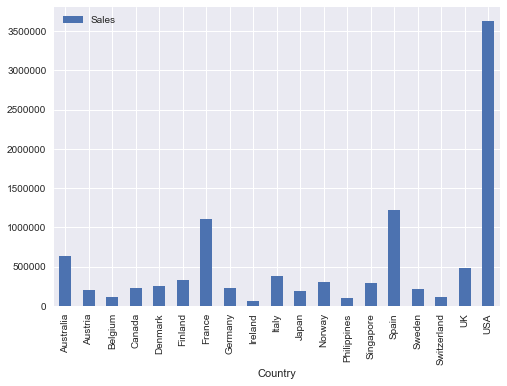

In [95]:
cg = df.groupby('Country')
plt.figure(figsize=(16, 6))
cg.sum().plot.bar(y='Sales')
plt.show()

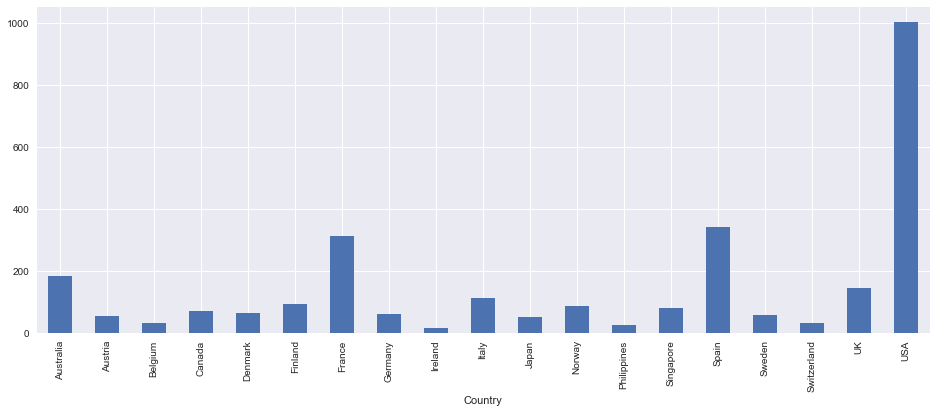

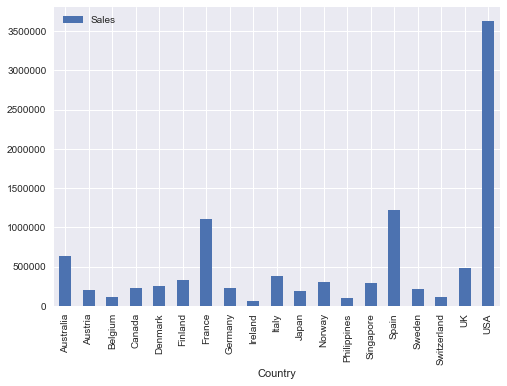

In [96]:
cg = df.groupby('Country')
plt.figure(figsize=(16, 6))
cg.size().plot.bar(y='total orders')
cg.sum().plot.bar(y='Sales')
plt.show()

In [84]:
cg.sum()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Qtr_id,Month_id,Year_id,Msrp
Country,,,,,,,,,
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493
Austria,564648,1974,4759.16,320,202062.53,153,383,110211,5662
Belgium,339687,1074,2887.31,164,108412.62,80,188,66138,3335
Canada,719223,2293,5957.05,415,224078.56,206,545,140274,6941
Denmark,644467,2197,5503.89,399,245637.15,181,444,126228,6826
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330
Germany,636423,2148,5184.30,388,220472.09,198,525,124227,6281
Ireland,164059,490,1377.98,73,57756.43,30,81,32064,1710


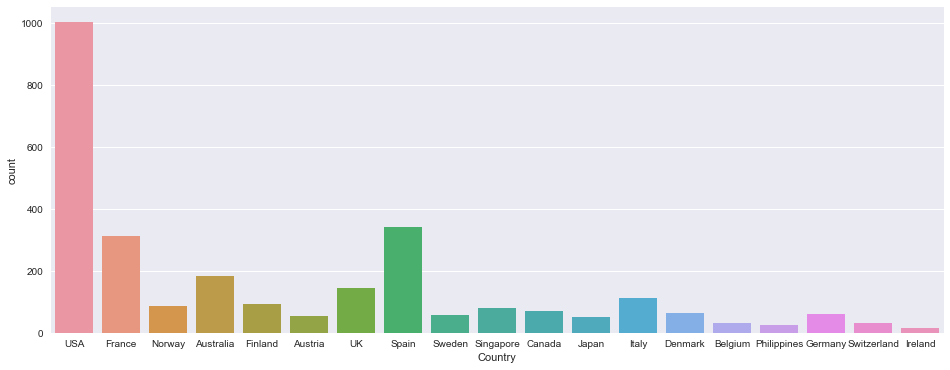

In [81]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Country', data=df)
plt.show()

In [103]:
cg.sum()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Qtr_id,Month_id,Year_id,Msrp
Country,,,,,,,,,
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493
Austria,564648,1974,4759.16,320,202062.53,153,383,110211,5662
Belgium,339687,1074,2887.31,164,108412.62,80,188,66138,3335
Canada,719223,2293,5957.05,415,224078.56,206,545,140274,6941
Denmark,644467,2197,5503.89,399,245637.15,181,444,126228,6826
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330
Germany,636423,2148,5184.30,388,220472.09,198,525,124227,6281
Ireland,164059,490,1377.98,73,57756.43,30,81,32064,1710


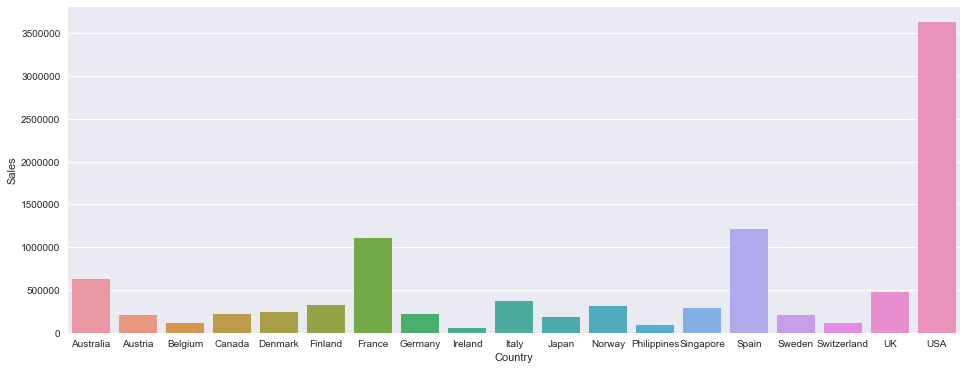

In [105]:
cg = df.groupby('Country')
plt.figure(figsize=(16, 6))
sns.barplot(x=cg.sum().index, y='Sales', data=cg.sum())
plt.show()

- aggregating

In [109]:
cg = df.groupby('Country')
cg.agg('sum')

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Qtr_id,Month_id,Year_id,Msrp
Country,,,,,,,,,
Australia,1898841,6246,15449.14,1181,630623.10,511,1345,370706,18493
Austria,564648,1974,4759.16,320,202062.53,153,383,110211,5662
Belgium,339687,1074,2887.31,164,108412.62,80,188,66138,3335
Canada,719223,2293,5957.05,415,224078.56,206,545,140274,6941
Denmark,644467,2197,5503.89,399,245637.15,181,444,126228,6826
Finland,944808,3192,7722.15,587,329581.91,202,485,184374,9360
France,3223513,11090,25920.87,2028,1110916.52,776,1960,629233,31330
Germany,636423,2148,5184.30,388,220472.09,198,525,124227,6281
Ireland,164059,490,1377.98,73,57756.43,30,81,32064,1710


In [112]:
cg.agg(['sum', 'mean'])[['Sales', 'Priceeach']]

Sales              Priceeach           
                    sum         mean       sum       mean
Country                                                  
Australia     630623.10  3408.773514  15449.14  83.508865
Austria       202062.53  3673.864182   4759.16  86.530182
Belgium       108412.62  3285.230909   2887.31  87.494242
Canada        224078.56  3201.122286   5957.05  85.100714
Denmark       245637.15  3899.002381   5503.89  87.363333
Finland       329581.91  3582.412065   7722.15  83.936413
France       1110916.52  3537.950701  25920.87  82.550541
Germany       220472.09  3556.001452   5184.30  83.617742
Ireland        57756.43  3609.776875   1377.98  86.123750
Italy         374674.31  3315.701858   9329.40  82.561062
Japan         188167.81  3618.611731   4290.26  82.505000
Norway        307463.70  3617.220000   7318.18  86.096235
Philippines    94015.73  3615.989615   2144.99  82.499615
Singapore     288488.41  3651.752025   6581.90  83.315190
Spain        1215686.92  3554.640117  28042.54  81.995731
Sweden        210014.21  3684.459825   4943.51  86.728246
Switzerland   117713.56  3797.211613   2713.09  87.519032
UK            478880.46  3325.558750  11882.70  82.518750
USA          3627982.83  3613.528715  84159.65  83.824353

In [113]:
cg.agg({'Sales': 'sum', 'Priceeach':'mean'})

,Sales,Priceeach
Country,,
Australia,630623.10,83.508865
Austria,202062.53,86.530182
Belgium,108412.62,87.494242
Canada,224078.56,85.100714
Denmark,245637.15,87.363333
Finland,329581.91,83.936413
France,1110916.52,82.550541
Germany,220472.09,83.617742
Ireland,57756.43,86.123750


### Merge/Join

In [ ]:
pd.merge(left, right, on='key')

In [ ]:
left.join(right, on=['key1', 'key2'], how='inner')

### Concatenating

In [ ]:
pd.concat([df1, df2])

### Crosstab

In [ ]:
pd.crosstab(df['key1'], df['key2'])

### Rearranging/Reshaping

- Transpose

In [121]:
df.T == df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822
Ordernumber,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Quantityordered,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Priceeach,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Orderlinenumber,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Sales,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Orderdate,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Status,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Qtr_id,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Month_id,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Year_id,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


- stack/unstak

In [153]:
df

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [168]:
sf = df.stack(level=0)
sf

0     Ordernumber           10107
      Quantityordered          30
      Priceeach              95.7
      Orderlinenumber           2
      Sales                  2871
                           ...   
2822  Postalcode            51003
      Country                 USA
      Contactlastname     Yoshido
      Contactfirstname       Juri
      Dealsize             Medium
Length: 65418, dtype: object

In [169]:
sf.unstack(level=1)

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.7,2,2871,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.7,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100,15,2244.4,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [170]:
sf.unstack(level=0)

,0,1,2,3,4,5,6,7,8,9,...,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822
Ordernumber,10107,10121,10134,10145,10159,10168,10180,10188,10201,10211,...,10293,10306,10315,10327,10337,10350,10373,10386,10397,10414
Quantityordered,30,34,41,45,49,36,29,48,22,41,...,32,35,40,37,42,20,29,43,34,47
Priceeach,95.7,81.35,94.74,83.26,100,96.66,86.13,100,98.57,100,...,60.06,59.51,55.69,86.74,97.16,100,100,100,62.24,65.52
Orderlinenumber,2,5,2,6,14,1,9,1,2,14,...,1,6,5,4,5,15,1,4,1,9
Sales,2871,2765.9,3884.34,3746.7,5205.27,3479.76,2497.77,5512.32,2168.54,4708.44,...,1921.92,2082.85,2227.6,3209.38,4080.72,2244.4,3978.51,5417.57,2116.16,3079.44
Orderdate,2/24/2003 0:00,5/7/2003 0:00,7/1/2003 0:00,8/25/2003 0:00,10/10/2003 0:00,10/28/2003 0:00,11/11/2003 0:00,11/18/2003 0:00,12/1/2003 0:00,1/15/2004 0:00,...,9/9/2004 0:00,10/14/2004 0:00,10/29/2004 0:00,11/10/2004 0:00,11/21/2004 0:00,12/2/2004 0:00,1/31/2005 0:00,3/1/2005 0:00,3/28/2005 0:00,5/6/2005 0:00
Status,Shipped,Shipped,Shipped,Shipped,Shipped,Shipped,Shipped,Shipped,Shipped,Shipped,...,Shipped,Shipped,Shipped,Resolved,Shipped,Shipped,Shipped,Resolved,Shipped,On Hold
Qtr_id,1,2,3,3,4,4,4,4,4,1,...,3,4,4,4,4,4,1,1,1,2
Month_id,2,5,7,8,10,10,11,11,12,1,...,9,10,10,11,11,12,1,3,3,5
Year_id,2003,2003,2003,2003,2003,2003,2003,2003,2003,2004,...,2004,2004,2004,2004,2004,2004,2005,2005,2005,2005


- pivot/pivot_table

In [172]:
df.head()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [192]:
pf = df.pivot(columns='Country', values=['Sales'])
pf.set_index(df['Ordernumber'].apply(str)+df['Orderdate'], inplace=True)
pf['Sales']['USA'].dropna(how='any')

101072/24/2003 0:00     2871.00
101458/25/2003 0:00     3746.70
1015910/10/2003 0:00    5205.27
1016810/28/2003 0:00    3479.76
1020112/1/2003 0:00     2168.54
                         ...   
1018511/14/2003 0:00    1804.04
102222/19/2004 0:00     2280.24
102485/7/2004 0:00      1506.96
1033711/21/2004 0:00    4080.72
104145/6/2005 0:00      3079.44
Name: USA, Length: 1004, dtype: float64

In [195]:
pf['Sales']['USA'].mean()

3613.5287151394423

In [194]:
ptf = df.pivot_table(index='Country', values=['Sales'], aggfunc='mean')
ptf

,Sales
Country,
Australia,3408.773514
Austria,3673.864182
Belgium,3285.230909
Canada,3201.122286
Denmark,3899.002381
Finland,3582.412065
France,3537.950701
Germany,3556.001452
Ireland,3609.776875


- melt

In [21]:
df2 = df.iloc[0:10,0:4]

In [23]:
df2

,age,workclass,fnlwgt,education
0,39,State-gov,77516,Bachelors
1,50,Self-emp-not-inc,83311,Bachelors
2,38,Private,215646,HS-grad
3,53,Private,234721,11th
4,28,Private,338409,Bachelors
5,37,Private,284582,Masters
6,49,Private,160187,9th
7,52,Self-emp-not-inc,209642,HS-grad
8,31,Private,45781,Masters
9,42,Private,159449,Bachelors


In [26]:
pd.melt(df2, id_vars=['workclass','education'], value_vars=['age', 'fnlwgt'], value_name='fnlwgt_age', var_name='index')

,workclass,education,index,fnlwgt_age
0,State-gov,Bachelors,age,39
1,Self-emp-not-inc,Bachelors,age,50
2,Private,HS-grad,age,38
3,Private,11th,age,53
4,Private,Bachelors,age,28
5,Private,Masters,age,37
6,Private,9th,age,49
7,Self-emp-not-inc,HS-grad,age,52
8,Private,Masters,age,31
9,Private,Bachelors,age,42


In [ ]:
df.cut()

In [ ]:
df.combine_first(df2)

In [ ]:
pd.concat(pieces)

In [121]:
stmp = df.iloc[3]
df.append(stmp, ignore_index=True)

,A,B,C,D,Append
0,0.000000,1.855360,3.001522,-1.607199,Mark
1,-1.155055,0.000000,1.638626,-0.262791,N
2,-0.766153,-0.499499,0.000000,-0.424870,M
3,-1.925768,-0.656789,0.035512,0.000000,T
4,-0.035881,1.788810,0.515268,0.472168,0
5,0.397780,0.277218,0.607874,-0.879547,5
6,-1.925768,-0.656789,0.035512,0.000000,T


In [210]:
df.assign(AC=lambda x: (x['A'] + x['C']))

,A,B,C,D,Append,AC
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark,3.001522
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N,0.483570
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M,-0.766153
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T,-1.890257
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0,0.479387
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5,1.005654


In [ ]:
df.align(df2, join='inner', axis=0)
join='outer'
join='left'
join='right'

In [ ]:
df.transform(np.abs)
df.transform('abs')
df.transform([np.abs, lambda x: x + 1])
tsdf.transform({'A': np.abs, 'B': lambda x: x + 1})
df.transform({'A': np.abs, 'B': [lambda x: x + 1, 'sqrt']})

In [ ]:
df.applymap(f)

In [ ]:
(df.pipe(h).pipe(g, arg1=1).pipe(f, arg2=2, arg3=3))
f(g(h(df), arg1=1), arg2=2, arg3=3)

### Setting

#### value setting in-place

In [95]:
df.at[dates[0], 'A'] = 0
df.iloc[0,0]

0.0

In [96]:
for i in range(5):
    df.iloc[i,i] = 0
df

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


#### value setting in-copy

In [106]:
df2.fillna('string')

,A,B,C,D,Append,E
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark,string
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N,string
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M,string
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T,string


### Analytic

In [ ]:
df.describe()

In [20]:
df.sample(n=1)

,age,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hour/week,country,salary,description
13795,41,Self-emp-not-inc,155767,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K,"age: 41, sex: Male, salary: <=50K"


In [183]:
df.mean(), df.mean(1)
df.sum(), df.sum(1)
df.quantile(), df.quantile(axis=1)

(A   -0.401017
 B    0.138609
 C    0.561571
 D   -0.343831
 Name: 0.5, dtype: float64, 2013-01-01    0.927680
 2013-01-02   -0.131396
 2013-01-03   -0.462185
 2013-01-04   -0.328395
 2013-01-05    0.493718
 2013-01-06    0.337499
 Freq: D, Name: 0.5, dtype: float64)

count Number of non-NA observations
sum Sum of values
mean Mean of values
mad Mean absolute deviation
median Arithmetic median of values
min Minimum
max Maximum
mode Mode
abs Absolute Value
prod Product of values
std Bessel-corrected sample standard deviation
var Unbiased variance
sem Standard error of the mean
skew Sample skewness (3rd moment)
kurt Sample kurtosis (4th moment)
quantile Sample quantile (value at %)
cumsum Cumulative sum
cumprod Cumulative product
cummax Cumulative maximum
cummin Cumulative minimum

In [114]:
df

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [116]:
df.iloc[:, 0:4].apply(lambda x: x.max() - x.min())

A    2.323549
B    2.512149
C    3.001522
D    2.079367
dtype: float64

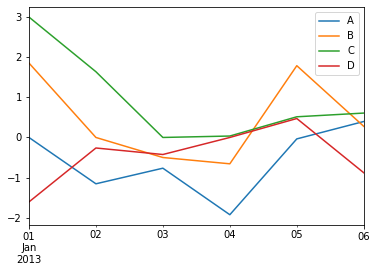

In [143]:
df.iloc[:, 0:4].plot()

## Ingestion APIs

### MySQl

In [221]:
import pandas as pd
from sqlalchemy import create_engine

In [223]:
alchemyconfig = {
    'user': 'root',
    'passw': 'root1MYSQL',
    'host': '127.0.0.1',
    'port': 3306,
    'database': 'pandasdb'
}

alchemyURL= 'mysql+mysqlconnector://{user}:{passw}@{host}/{database}'.format(**alchemyconfig)

mydb = create_engine(alchemyURL, echo=False)

In [224]:
dbdf = pd.read_sql_query("SELECT * FROM past_due", mydb)

In [226]:
dbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143712 entries, 0 to 143711
Data columns (total 3 columns):
id             143712 non-null object
report_date    143712 non-null object
past_due       143712 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


### csv

In [157]:
df4 = pd.read_csv('Data/foo.csv', index_col=0)

In [158]:
df4

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [ ]:
series = pd.read_csv('Data/random1.csv', header=None, squeeze=True, usecols=['data'])

### json

In [164]:
df5 = pd.read_json('Data/foo.json')
df5

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [9]:
import pandas.io.json as json

In [160]:
jsondata = ata = [{
 'CreatedBy': {'Name': 'User001'},
 'Lookup': {'TextField': 'Some text',
                 'UserField': {'Id': 'ID001', 'Name': 'Name001'}},
 'Image': {'a': 'b'}
 }]
                 

In [11]:
json.json_normalize(jsondata, max_level=1)

,CreatedBy.Name,Lookup.TextField,Lookup.UserField,Image.a
0,User001,Some text,"{'Id': 'ID001', 'Name': 'Name001'}",b


In [12]:
json.json_normalize(jsondata)

,CreatedBy.Name,Lookup.TextField,Lookup.UserField.Id,Lookup.UserField.Name,Image.a
0,User001,Some text,ID001,Name001,b


### HTML

In [261]:
from bs4 import BeautifulSoup

In [263]:
dfhtml = pd.read_html('Data/foo.html')
dfhtml

[   Unnamed: 0 kind  height  weight
 0           0  cat     9.1     7.9
 1           1  dog     6.0     7.5
 2           2  cat     9.5     9.9
 3           3  dog    34.0   198.0,
    Unnamed: 0         A         B         C         D Append
 0  2013-01-01  0.000000  1.855360  3.001522 -1.607199   Mark
 1  2013-01-02 -1.155055  0.000000  1.638626 -0.262791      N
 2  2013-01-03 -0.766153 -0.499499  0.000000 -0.424870      M
 3  2013-01-04 -1.925768 -0.656789  0.035512  0.000000      T
 4  2013-01-05 -0.035881  1.788810  0.515268  0.472168      0
 5  2013-01-06  0.397780  0.277218  0.607874 -0.879547      5,
    Unnamed: 0    A         B         C         D
 0  2013-01-01  0.0  1.855360  3.001522 -1.607199
 1  2013-01-02  0.0  1.155055  2.793681  0.892264
 2  2013-01-03  0.0  0.266654  0.766153  0.341283
 3  2013-01-04  0.0  1.268979  1.961280  1.925768
 4  2013-01-05  0.0  1.824691  0.551149  0.508049
 5  2013-01-06  0.0 -0.120562  0.210093 -1.277327,
    Unnamed: 0         A         

### excel

In [155]:
df3 = pd.read_excel('Data/foo.xlsx', 'Sheet1', index_col=0, na_values=['NA'])
df3

,A,B,C,D,Append
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


### pandas_datareader

In [9]:
import pandas_datareader as pdr

In [10]:
print(pdr.get_quote_yahoo('AAPL')['price'])

AAPL    205.7
Name: price, dtype: float64


### HDFS

In [ ]:
pd.read_hdf('foo.h5', 'df')

## Egression APIs

In [33]:
df.to_numpy()

array([[-1.51305087, -0.40302837, -0.59074983,  0.31373345],
       [-0.27749268,  1.38227713, -0.77474846, -0.53165227],
       [-1.67716694, -0.94269858, -0.7224141 , -0.37017509],
       [-0.79726605,  0.39486903, -0.65376924, -0.61435065],
       [ 1.22966166, -0.56627776,  1.83249856, -2.02541706],
       [ 0.35525285, -1.08157886,  1.58211143, -0.94390518]])

In [162]:
df.to_csv('Data/foo.csv')

In [163]:
df.to_json('Data/foo.json', orient='columns')

In [150]:
df.to_excel('Data/foo.xlsx', sheet_name='Sheet1')

In [151]:
df.to_hdf('Data/foo.h5', 'df')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->['Append']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


### MySQL

In [234]:
import pandas as pd
from sqlalchemy import create_engine
alchemyconfig = {
    'user': 'root',
    'passw': 'root1MYSQL',
    'host': '127.0.0.1',
    'port': 3306,
    'database': 'pandasdb'
}

alchemyURL= 'mysql+mysqlconnector://{user}:{passw}@{host}/{database}'.format(**alchemyconfig)

mydb = create_engine(alchemyURL, echo=False)

In [235]:
df.to_sql(name='dftable01', con=mydb, if_exists = 'replace', index=True)

In [236]:
pd.read_sql_query("desc dftable01", mydb)

,Field,Type,Null,Key,Default,Extra
0,index,datetime,YES,MUL,None,
1,A,double,YES,,None,
2,B,double,YES,,None,
3,C,double,YES,,None,
4,D,double,YES,,None,
5,Append,text,YES,,None,


In [249]:
dftable01 = pd.read_sql_query("select * from dftable01", mydb, index_col='index')
dftable01

,A,B,C,D,Append
index,,,,,
2013-01-01,0.000000,1.855360,3.001522,-1.607199,Mark
2013-01-02,-1.155055,0.000000,1.638626,-0.262791,N
2013-01-03,-0.766153,-0.499499,0.000000,-0.424870,M
2013-01-04,-1.925768,-0.656789,0.035512,0.000000,T
2013-01-05,-0.035881,1.788810,0.515268,0.472168,0
2013-01-06,0.397780,0.277218,0.607874,-0.879547,5


In [257]:
all(dftable01.index == df.index)

True

## Pandas Data and Types

### Types

bool  
int8; uint8; int32; int64  
float32; float64  
datetime64; timedelta64
category
object  

### Datetime

In [26]:
from datetime import datetime
import pandas as pd
import numpy as np

In [19]:
t1 = pd.Timestamp(datetime(2019, 2, 1))
t2 = pd.Timestamp('2019-02-01')
t3 = pd.Timestamp(2019, 2, 1)

In [17]:
t1

Timestamp('2019-02-01 00:00:00')

In [22]:
p1 = pd.Period('2017-01')
p2 = pd.Period('2017-05', freq='D')

In [24]:
p2

Period('2017-05-01', 'D')

In [36]:
time_index = pd.date_range('2017-01',periods=3)

In [37]:
time_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='D')

In [39]:
ts = pd.Series(np.random.randn(3), index=time_index)

In [40]:
ts

2017-01-01    1.441977
2017-01-02   -0.185040
2017-01-03   -2.358823
Freq: D, dtype: float64

In [53]:
index = pd.date_range(datetime(2019, 1, 1), periods=1000, freq='M')
index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31',
               ...
               '2101-07-31', '2101-08-31', '2101-09-30', '2101-10-31',
               '2101-11-30', '2101-12-31', '2102-01-31', '2102-02-28',
               '2102-03-31', '2102-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')

In [51]:
index2 = pd.bdate_range(datetime(2019, 1, 1), datetime(2020, 1, 1))
index2

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=262, freq='B')

In [41]:
s1 = pd.to_datetime(pd.Series(['Jul 31, 2009',
                               '2010-01-10',
                               None, '2005/11/23',
                               '2010.12.31']))
s1

0   2009-07-31
1   2010-01-10
2          NaT
3   2005-11-23
4   2010-12-31
dtype: datetime64[ns]

In [43]:
s2 = pd.to_datetime(pd.Series(['Jul 31, 2009',
                               '2010-01-10',
                               None, '2005/11/23',
                               '2010.12.31']),
                   dayfirst=True)
s2

0   2009-07-31
1   2010-01-10
2          NaT
3   2005-11-23
4   2010-12-31
dtype: datetime64[ns]

In [47]:
d1 = [datetime(2019, 5, 1),
      datetime(2019, 5, 2),
      datetime(2019, 5, 3)]

In [48]:
pd.DatetimeIndex(d1)

DatetimeIndex(['2019-05-01', '2019-05-02', '2019-05-03'], dtype='datetime64[ns]', freq=None)

### Vectorize Objects

In [21]:
pd.to_datetime(1490195805, unit='s')
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [18]:
pd.Timestamp('20130102')
pd.Timestamp.now()

Timestamp('2019-09-04 14:26:29.243490')

In [ ]:
s = pd.Series(pd.date_range('20130101 09:10:12', periods=4))
s.dt.day

In [188]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Categorical

In [131]:
c = df["Append"].astype("category")

In [134]:
ct = pd.Categorical(["test", "train", "test", "train"])

In [135]:
ct

[test, train, test, train]
Categories (2, object): [test, train]

In [138]:
c.cat.categories

Index([0, 5, 'M', 'Mark', 'N', 'T'], dtype='object')

In [286]:
c.cat.ordered

False

# Pandas Ploting

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

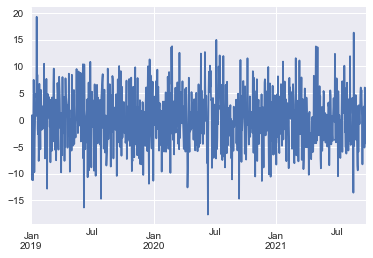

In [32]:
normal_distribution = np.random.normal(0, 5, 1000)
time_series = pd.date_range('2019-01-01', periods=1000)
s1 = pd.Series(normal_distribution, index=time_series)
plt.figure()
plt.style.use('seaborn')
s1.plot()
plt.show()

<Figure size 576x396 with 0 Axes>

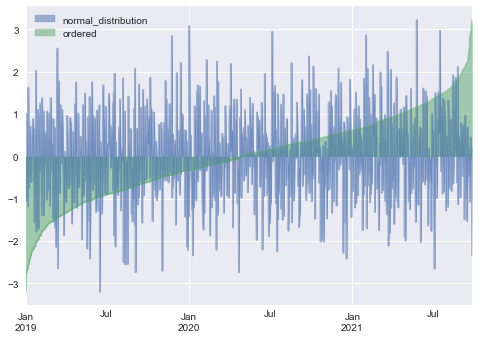

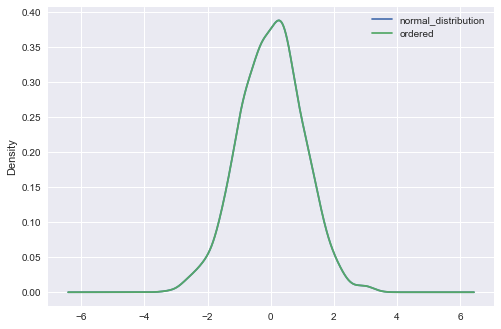

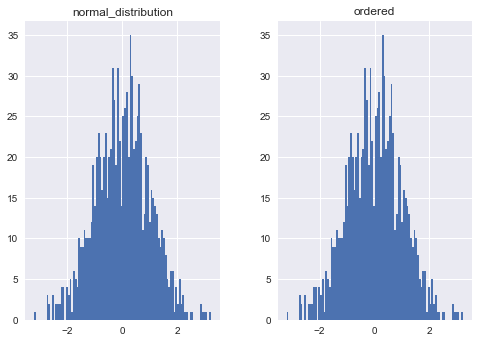

In [33]:
normal_distribution = np.random.normal(0, 1, 1000)
ordered = np.sort(normal_distribution)
time_series = pd.date_range('2019-01-01', periods=1000)
df_data = {'normal_distribution':normal_distribution, 'ordered':ordered}
df = pd.DataFrame(df_data, index=time_series)

plt.figure()
df.plot.area(stacked=False)
df.plot.density()
hist = df.hist(bins=100)
plt.show()

## bar

<Figure size 432x288 with 0 Axes>

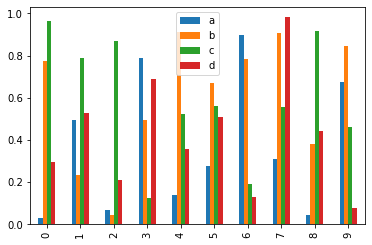

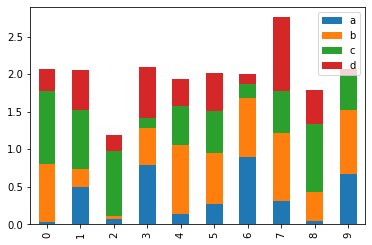

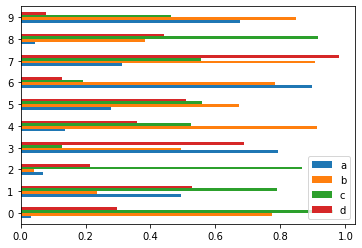

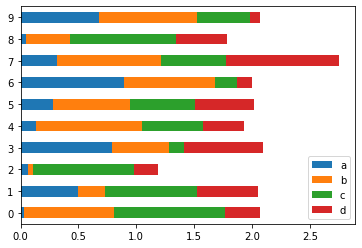

In [31]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
plt.figure()
df2.plot.bar()
df2.plot.bar(stacked=True)
df2.plot.barh()
df2.plot.barh(stacked=True)
plt.show()

## hist

In [27]:
from sklearn import datasets

In [28]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisdf.columns=irisdf.columns.str.replace(' ','')
irisdf['species']=pd.Series(iris.target).apply(lambda i: iris.target_names[i])
irisdf

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267A9FC3E48>,
      dtype=object)

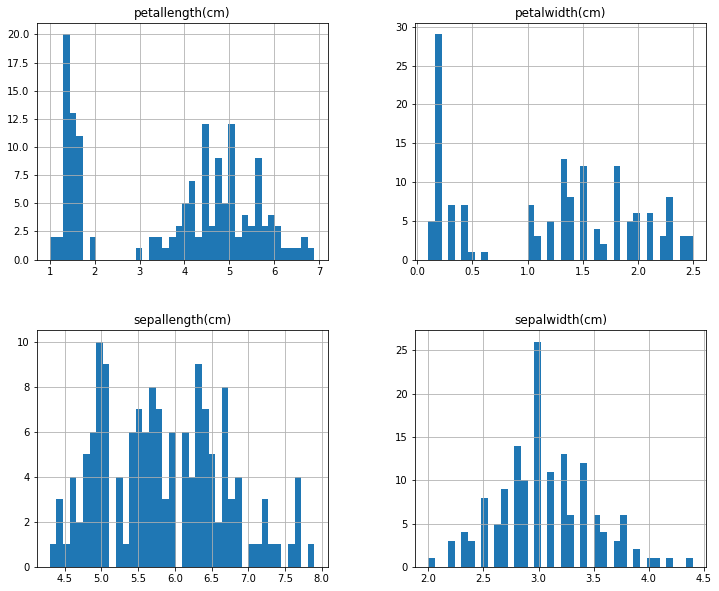

In [31]:
irisdf.hist(figsize=(12,10), bins=40)

<Figure size 432x288 with 0 Axes>

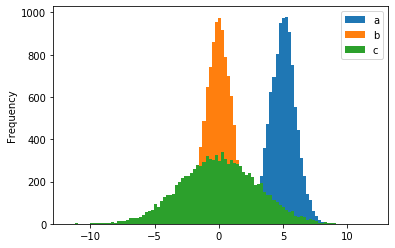

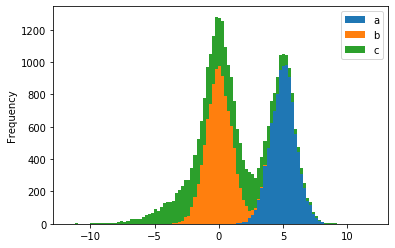

In [45]:
df4 = pd.DataFrame({'a': np.random.normal(0, 1, 10000)+5, 'b': np.random.randn(10000),
'c': np.random.normal(0, 3, 10000)}, columns=['a', 'b', 'c'])

plt.figure();
df4.plot.hist(bins=100)
df4.plot.hist(bins=100, stacked=True)
plt.show()

## box

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000267ACFD1208>,
      dtype=object)

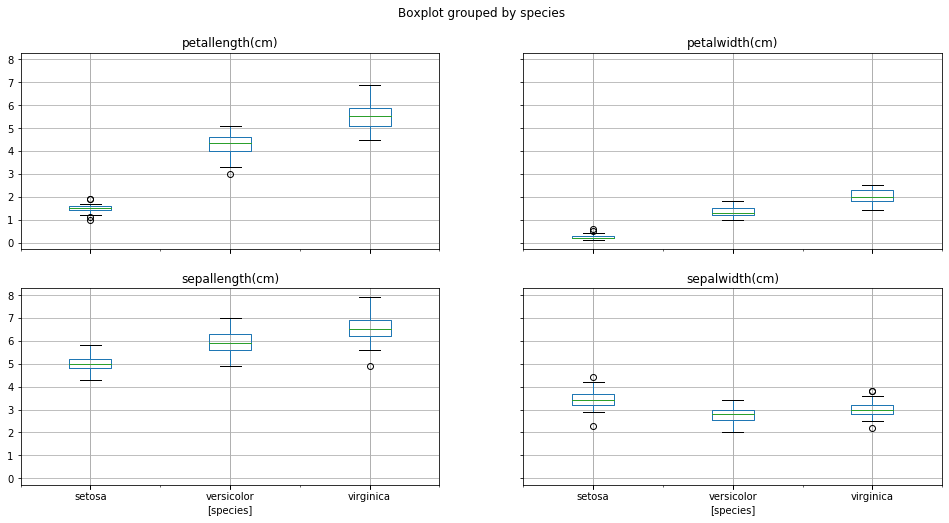

In [43]:
irisdf.boxplot(by='species', figsize=(16,8))

<Figure size 432x288 with 0 Axes>

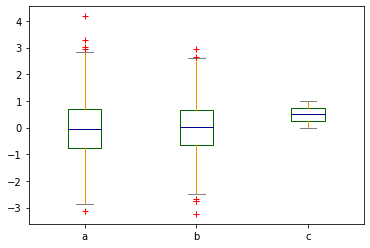

In [49]:
df = pd.DataFrame({'a': np.random.normal(0, 1, 1000), 'b': np.random.randn(1000),
'c': np.random.rand(1000)}, columns=['a', 'b', 'c'])

color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')
plt.figure()
df.plot.box(color=color, sym='r+')
plt.show()

<Figure size 432x288 with 0 Axes>

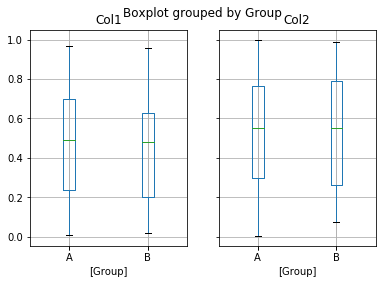

In [52]:
df = pd.DataFrame(np.random.rand(100,2), columns=['Col1', 'Col2'] )
df['Group'] = pd.Series([ 'A' if x > 0.5 else 'B' for x in np.random.rand(100) ])

plt.figure();
bp = df.boxplot(by='Group')
plt.show()

## area

<Figure size 432x288 with 0 Axes>

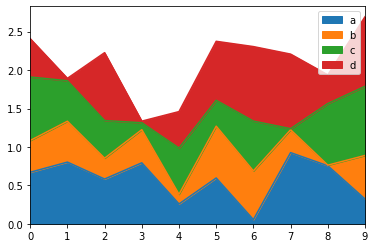

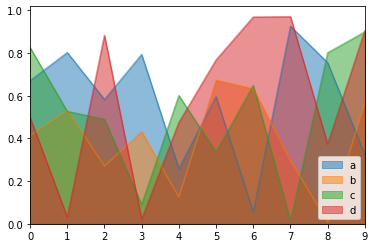

In [57]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
plt.figure()
df.plot.area()
df.plot.area(stacked=False)
plt.show()

## scatter

In [67]:
irisdf.columns

Index(['sepallength(cm)', 'sepalwidth(cm)', 'petallength(cm)',
       'petalwidth(cm)', 'species'],
      dtype='object')

In [64]:
sg.species

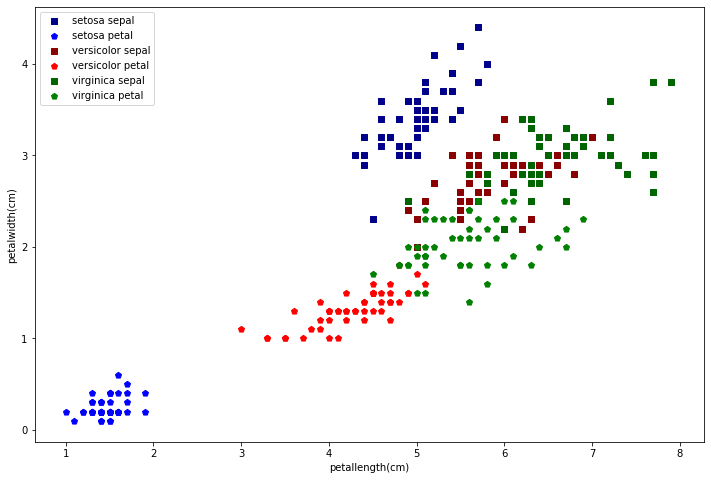

In [84]:
sg = irisdf.groupby('species')

fig = plt.figure(figsize=(12,8))
ax = plt.gca()

color=[['DarkBlue', 'Blue'], ['DarkRed', 'Red'], ['Darkgreen', 'Green']]
for index, group in enumerate(sg.groups):
    sg.get_group(group).plot.scatter(x='sepallength(cm)', 
                                     y='sepalwidth(cm)',
                                     color=color[index][0],
                                     marker='s', s=40,
                                     label=group+' sepal', ax=ax)
    sg.get_group(group).plot.scatter(x='petallength(cm)', 
                                 y='petalwidth(cm)',
                                 color=color[index][1],
                                 marker='p', s=40,
                                 label=group+' petal', ax=ax)
plt.show()

<Figure size 432x288 with 0 Axes>

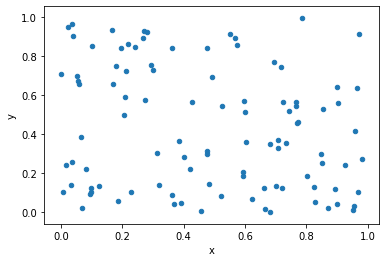

In [60]:
df = pd.DataFrame(np.random.rand(100, 2), columns=['x','y'])
plt.figure()
df.plot.scatter(x='x', y='y')
plt.show()

<Figure size 432x288 with 0 Axes>

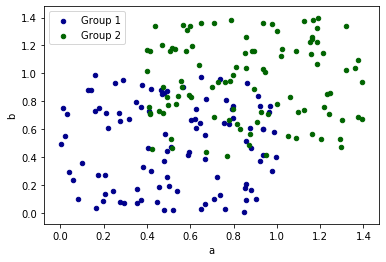

In [64]:
df = pd.DataFrame(np.random.rand(100, 2), columns=['x','y'])
df2 = pd.DataFrame(np.random.rand(100, 2)+0.4, columns=['a','b'])

plt.figure()
ax = df.plot.scatter(x='x', y='y', color='DarkBlue', label='Group 1')
df2.plot.scatter(x='a', y='b', color='DarkGreen', label='Group 2', ax=ax)
plt.show()

In [71]:
s= '''
SILVER	#C0C0C0	RGB(192, 192, 192)
GRAY	#808080	RGB(128, 128, 128)
BLACK	#000000	RGB(0, 0, 0)
RED	#FF0000	RGB(255, 0, 0)
MAROON	#800000	RGB(128, 0, 0)
YELLOW	#FFFF00	RGB(255, 255, 0)
OLIVE	#808000	RGB(128, 128, 0)
LIME	#00FF00	RGB(0, 255, 0)
GREEN	#008000	RGB(0, 128, 0)
AQUA	#00FFFF	RGB(0, 255, 255)
TEAL	#008080	RGB(0, 128, 128)
BLUE	#0000FF	RGB(0, 0, 255)
NAVY	#000080	RGB(0, 0, 128)
FUCHSIA	#FF00FF	RGB(255, 0, 255))
PURPLE	#800080	RGB(128, 0, 128))
'''
import re
colors = re.findall('[#][0-9A-F]{6}',s)

<Figure size 432x288 with 0 Axes>

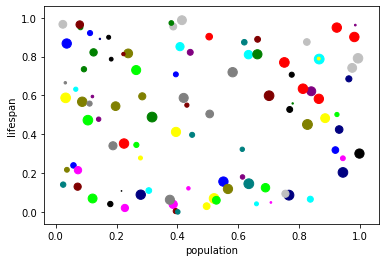

In [75]:
df = pd.DataFrame(np.random.rand(100, 4), columns=['population','lifespan', 'perGDP', 'GDP'])
colorset = [colors[i%len(colors)] for i in range(100)]
plt.figure()
df.plot.scatter(x='population', y='lifespan', c=colorset, s=df['GDP']*100)
plt.show()

## hexbin

<Figure size 432x288 with 0 Axes>

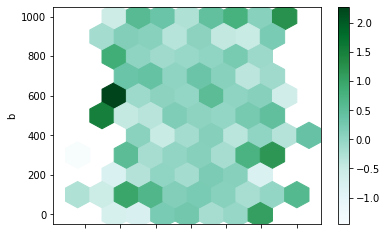

In [80]:
df = pd.DataFrame(np.random.randn(1000, 3), columns=['a', 'b', 'observ'])
df['b'] = df['b'] + np.arange(1000)

plt.figure()
df.plot.hexbin(x='a', y='b', C='observ', gridsize=10)
plt.show()

## pie

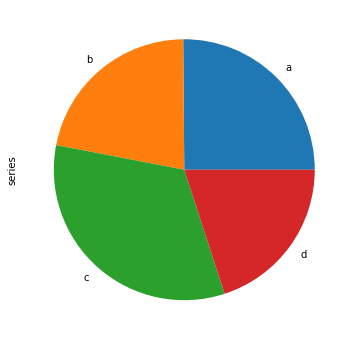

In [85]:
series = pd.Series(np.random.rand(4), 
                   index=['a', 'b', 'c', 'd'], name='series')
plt.figure()
series.plot.pie(figsize=(6, 6))
plt.show()

<Figure size 432x288 with 0 Axes>

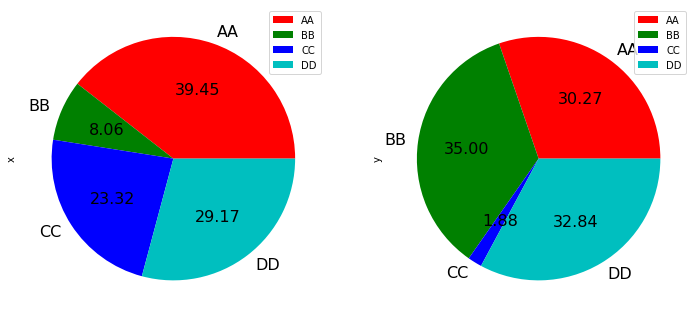

In [90]:
df = pd.DataFrame(np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], 
                  columns=['x', 'y'])
plt.figure()
df.plot.pie(subplots=True, figsize=(12, 6), 
            labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'], 
            autopct='%.2f', fontsize=16)
plt.show()

## scatter_matrix

<Figure size 432x288 with 0 Axes>

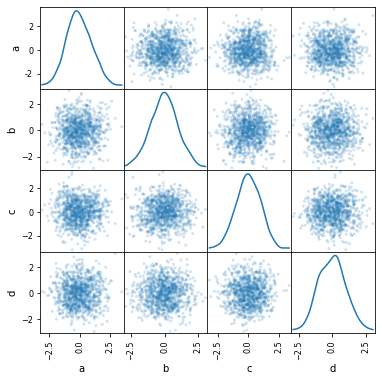

In [92]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
plt.figure()
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

## kde

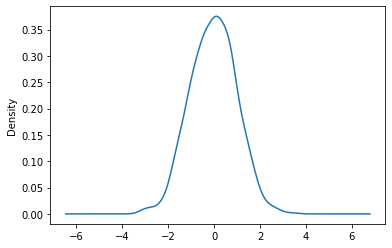

In [93]:
s1 = pd.Series(np.random.randn(1000))
plt.figure()
s1.plot.kde()
plt.show()

## lag_plot

In [ ]:
from pandas.plotting import lag_plot
plt.figure()
data = pd.Series(0.1 * np.random.rand(1000) +
0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

## autocorrelation_plot

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure()
data = pd.Series(0.7 * np.random.rand(1000) +
0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

## bootstrap_plot

In [ ]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
plt.figure()
bootstrap_plot(data, size=50, samples=500, color='grey')

## pyplot.fill_between

In [ ]:
price = pd.Series(np.random.randn(150).cumsum(),
index=pd.date_range('2000-1-1', periods=150, freq='B'))
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

# Statistic

# END